In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
x_data = [338, 333, 328, 207, 226, 25, 179, 60, 208,  606]
y_data = [640, 633, 619, 393, 428, 27, 193, 66, 226, 1591]

In [84]:
x = np.arange(-200, -100,  0.1)
y = np.arange(  -5,    5, 0.01)
Z = np.zeros((len(x),len(y)))
X, Y = np.meshgrid(x,y)

for i in range(len(x)) :
    for j in range(len(y)) :
        b = x[i]
        w = y[j]
        for n in range(len(x_data)) :
            Z[j][i] += (y_data[n] - b - w*x_data[n])**2
        Z[j][i] /= len(x_data)


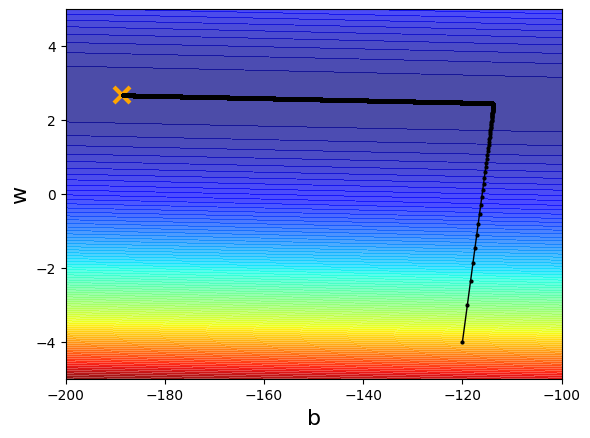

In [112]:
b = -120
w = -4
lr = 1
iter = int(1e+05)

b_temp = [b]
w_temp = [w]

lr_b = 0
lr_w = 0

for i in range(iter) :
    b_grad = 0
    w_grad = 0
    for n in range(len(x_data)) :
        b_grad += -2 * (y_data[n] - b - w*x_data[n])
        w_grad += -2 * x_data[n] * (y_data[n] - b - w*x_data[n])
    lr_b += b_grad ** 2
    lr_w += w_grad ** 2
    b += -lr/np.sqrt(lr_b) * b_grad
    w += -lr/np.sqrt(lr_w) * w_grad
    b_temp.append(b)
    w_temp.append(w)

plt.contourf(x,y,Z, 100, alpha = 0.7, cmap = plt.get_cmap("jet"))
plt.plot(x[np.where(Z==np.min(Z))[1]], y[np.where(Z==np.min(Z))[0]], "x", ms = 12, markeredgewidth = 3, color = "orange")
plt.plot(b_temp, w_temp, "o-", ms = 2, lw = 1, color = "black")
plt.xlim(-200,-100)
plt.ylim(   -5,  5)
plt.xlabel("b", fontsize = 16)
plt.ylabel("w", fontsize = 16)
plt.show()
